In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# function huruf abcde putih bg item
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,350),fontFace=font,fontScale=5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [60]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

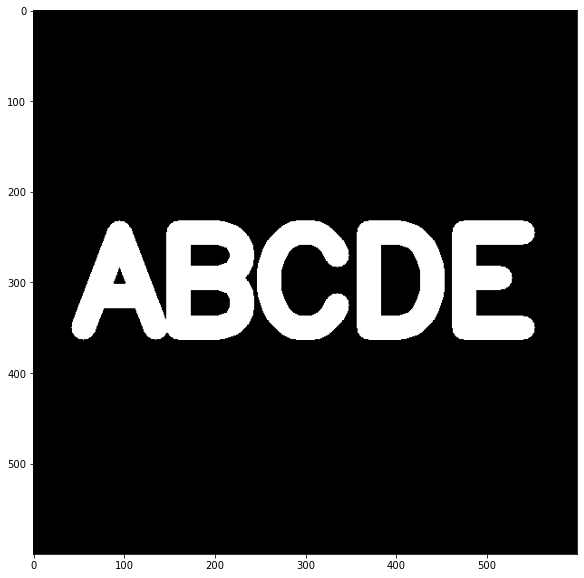

In [61]:
img = load_img()
display_img(img)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

erosi itu ngikis foreground nya dari luar jadi makin tipis

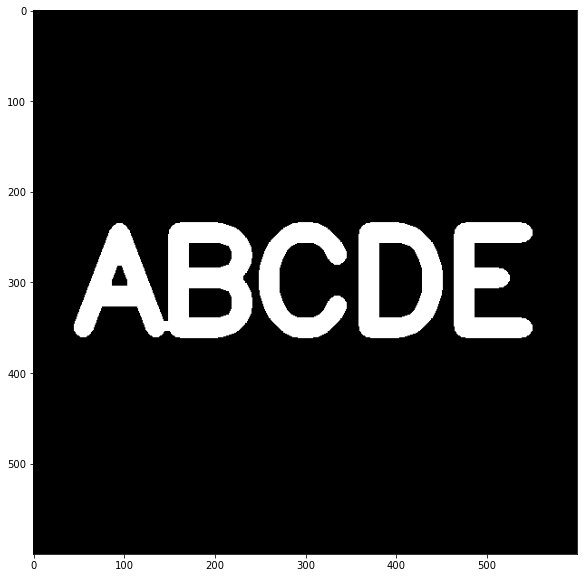

In [62]:
# kernel bisa di main2in kalo mau
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations=1)
display_img(erosion1)

# huruf nya jadi lebih tipis dikit
# tap mungkin ga gitu jelas

In [63]:
# skrg coba iterations nya jadi 4
# artinya di erode 4 kali
# pasti jelas
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion4 = cv2.erode(img,kernel,iterations=4)

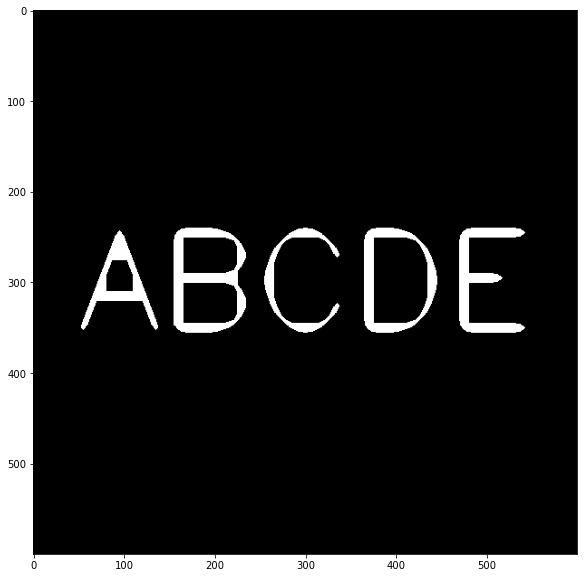

In [64]:
display_img(erosion4)

## Dilation
Kebalikan erotion, dia malah nambah gedein pinggirnya

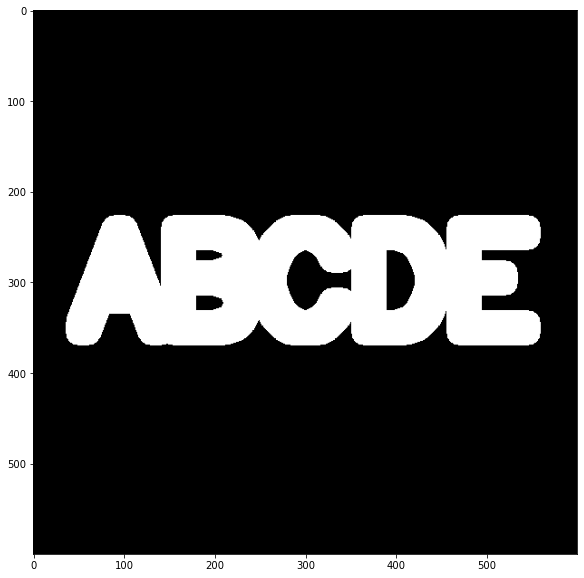

In [65]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
dilation3 = cv2.dilate(img,kernel,iterations=3)
display_img(dilation3)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

opening tuh ngilangin noise di background

In [66]:
img = load_img()

In [67]:
# kita bikin white noise
# high=2 soalnya kita mau 0 ato 1, exclusive 2 nya
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [68]:
# kali 255 soalnya item 0 putih 255
white_noise = white_noise * 255
white_noise

array([[  0,   0, 255, ..., 255,   0,   0],
       [  0, 255, 255, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0, 255,   0],
       [  0,   0, 255, ..., 255,   0,   0]])

In [69]:
white_noise.shape

(600, 600)

In [70]:
img.shape

(600, 600)

In [71]:
noise_img = white_noise+img

In [72]:
# yg 510 jadiin 255
noise_img[noise_img==510] = 255

In [73]:
noise_img

array([[  0.,   0., 255., ..., 255.,   0.,   0.],
       [  0., 255., 255., ...,   0., 255., 255.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 255.,   0., ...,   0., 255.,   0.],
       [  0.,   0., 255., ..., 255.,   0.,   0.]])

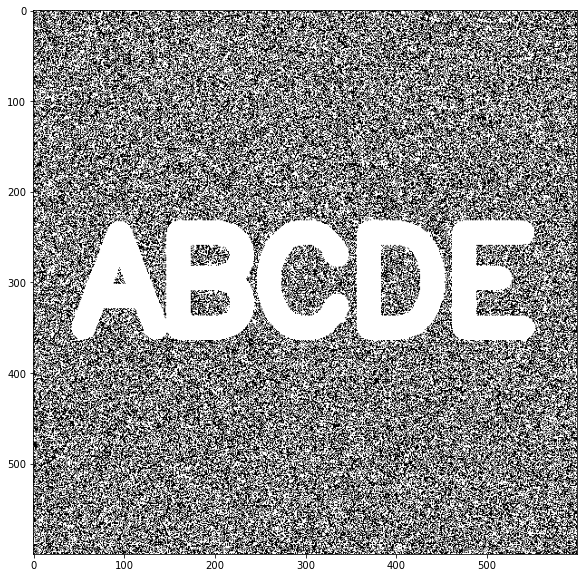

In [74]:
display_img(noise_img)

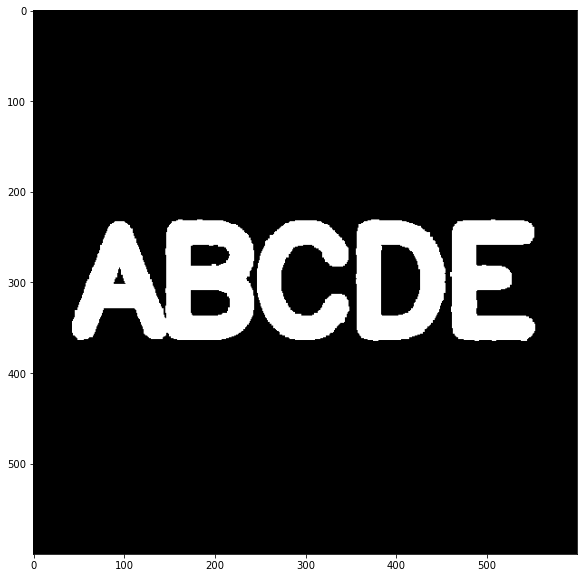

In [75]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)
# noisenya ilang walau masih agak berantakan edge nya

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

kalo closing ngilangin noise di foreground

In [76]:
img = load_img()

In [77]:
# skrg kita bikin black noise
# pake -255

In [78]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [79]:
black_noise

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [80]:
black_noise = black_noise * -255

In [81]:
black_noise_img = img + black_noise

In [82]:
black_noise_img

array([[-255., -255., -255., ..., -255., -255., -255.],
       [   0., -255.,    0., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ..., -255., -255., -255.],
       ...,
       [   0.,    0.,    0., ..., -255., -255.,    0.],
       [   0.,    0.,    0., ...,    0.,    0., -255.],
       [   0.,    0., -255., ...,    0.,    0.,    0.]])

In [83]:
# yg -255 jadiin 0
black_noise_img[black_noise_img==-255] = 0

In [84]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

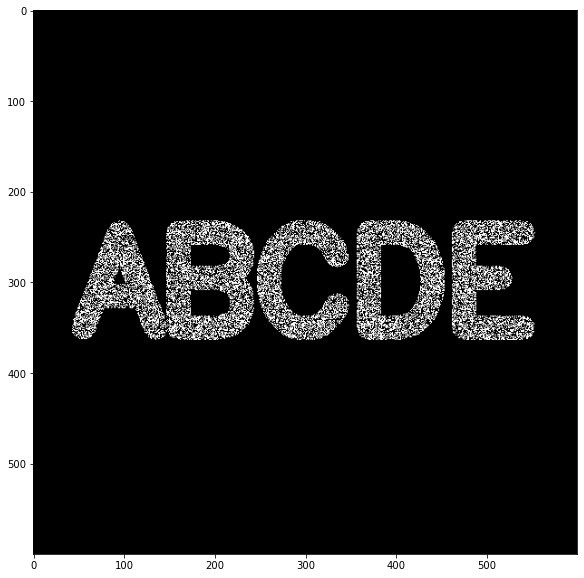

In [85]:
display_img(black_noise_img)

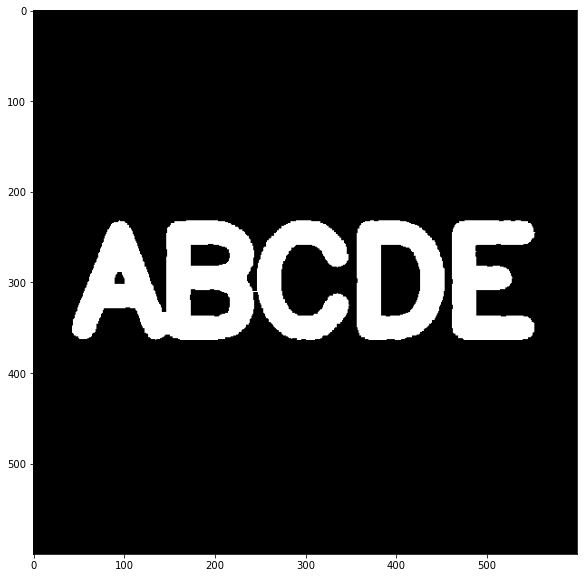

In [87]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

kalo gradient itu nyisain pinggir nya doank, di kikis dalemnya

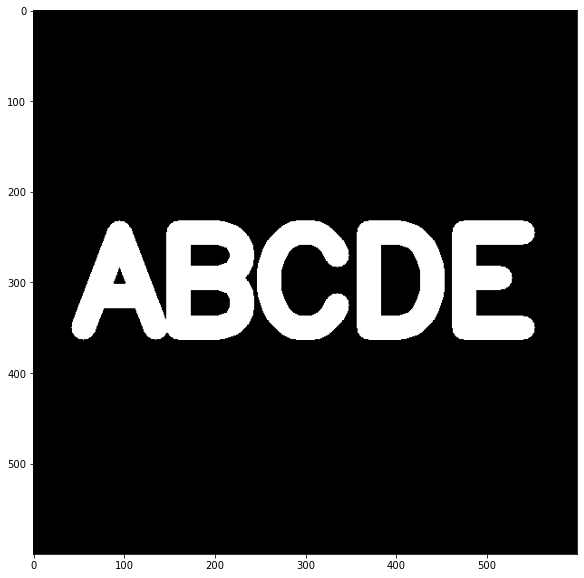

In [88]:
img = load_img()
display_img(img)

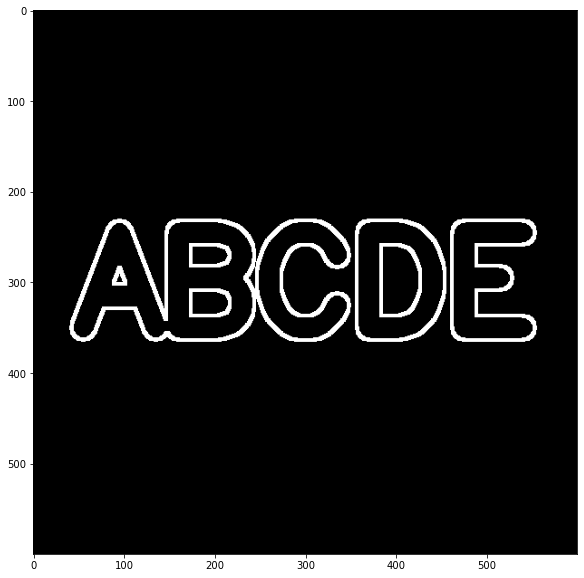

In [89]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)